Importing libraries and data and creating a copy

In [17]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

In [18]:
pima = pd.read_csv("Employee-Attrition.csv")

In [19]:
df=pima.copy()

Exploring the data

In [20]:
df.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

Attrition is shown as Yes and No which will need to be changed as this is our target variable.

In [21]:
df.shape

(1470, 35)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
df.describe(include="all")

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction  \
count          1470.0     1470.000000  ...               1470.000000   
unique            NaN             NaN  ...                       NaN   
top               NaN             NaN  ...                       NaN   
freq              NaN             NaN  ...                       NaN   
mean              1.0     1024.865306  ...                  2.712245   
std               0.0      602.024335  ...                  1.081209   
min               1.0        1.000000  ...                  1.000000   
25%               1.0      491.250000  ...                  2.000000   
50%               1.0     1020.500000  ...                  3.000000   
75%               1.0     1555.750000  ...                  4.000000   
max               1.0     2068.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
unique           NaN               NaN                NaN   
top              NaN               NaN                NaN   
freq             NaN               NaN                NaN   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

        TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
count             1470.000000     1470.000000     1470.000000   
unique                    NaN             NaN             NaN   
top                       NaN             NaN             NaN   
freq                      NaN             NaN             NaN   
mean                 2.799320        2.761224        7.008163   
std                  1.289271        0.706476        6.126525   
min                  0.000000        1.000000        0.000000   
25%                  2.000000        2.000000        3.000000   
50%                  3.000000        3.000000        5.000000   
75%                  3.000000        3.000000        9.000000   
max      

Check for missing values

In [24]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Check for unique values

In [25]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

###### Since EmployeeNumber is unique, we can drop it. StandardHours,Over18 and EmployeeCount have a constant value and can also be dropped

In [26]:
df.drop(["EmployeeNumber"], axis=1, inplace=True)

In [27]:
df.drop(["StandardHours","Over18","EmployeeCount" ], axis=1, inplace=True)

In [28]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

Create plots for numerical and categorical variables and plots by attrition

In [56]:
def create_plots(data, columns, bins=20):
    for column in columns:
        plt.figure(figsize=(8, 6))
        
        if data[column].dtype in ['int64', 'float64']:
            sns.histplot(data[column], bins=bins, kde=True)
            plt.ylabel('Frequency')
        else:
            sns.countplot(x=column, data=data)
            plt.ylabel('Count')
        
        plt.xlabel(column)
        plt.title(f'{column} Distribution')
        plt.show()

In [57]:
def labeled_barplot(data, feature, perc=False, n=None):
 
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()  

In [58]:
def create_barplots_by_attrition(data, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Attrition', y=column, data=data)
        plt.xlabel('Attrition')
        plt.ylabel(column)
        plt.title(f'{column} Distribution by attrition')
        plt.show()

def create_countplots_by_attrition(data, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Attrition', data=data)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} Distribution by attrition')
        plt.legend(title='Attrition')
        plt.show()

Define categorical and numerical variables

In [59]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [60]:
def boxplot(x):
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=df, x="Attrition", y=df[x], palette="PuBu")
    plt.show()

Execute function

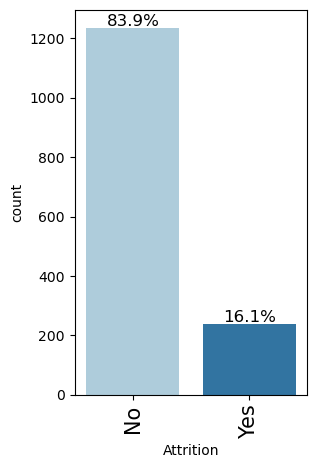

In [61]:
labeled_barplot(df, "Attrition", perc=True)

The data is imbalanced with a larger part of the answers being "No"

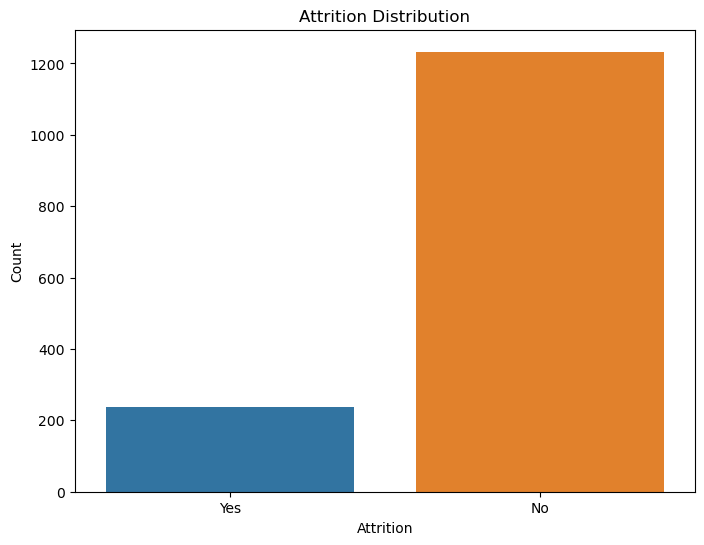

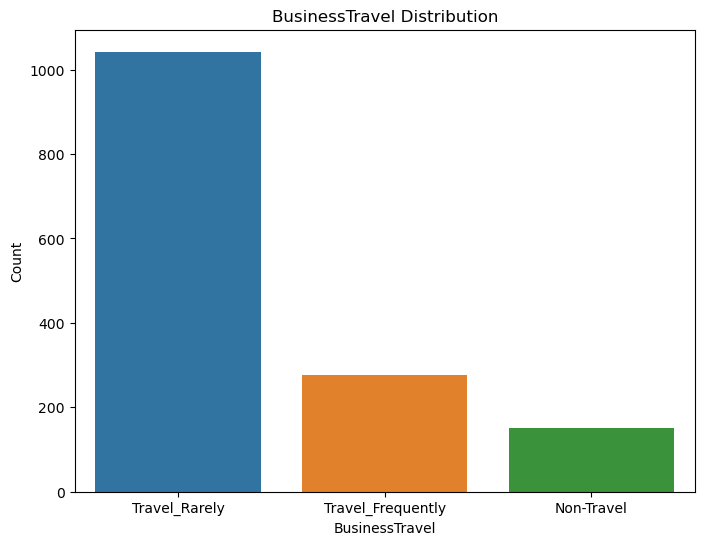

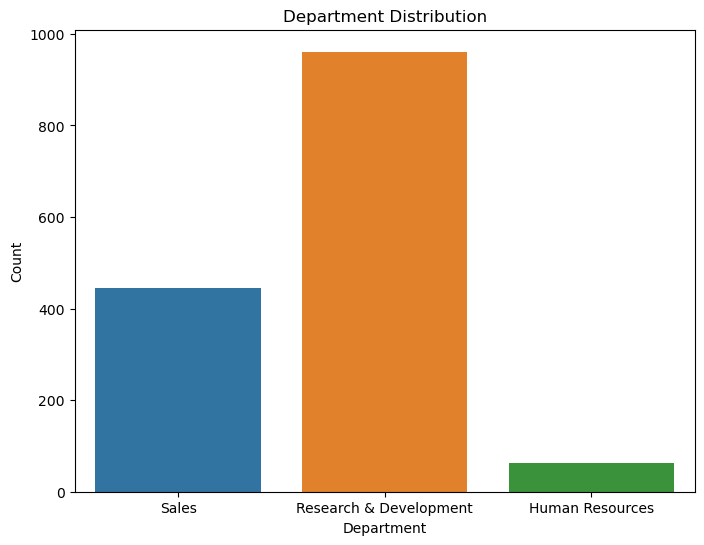

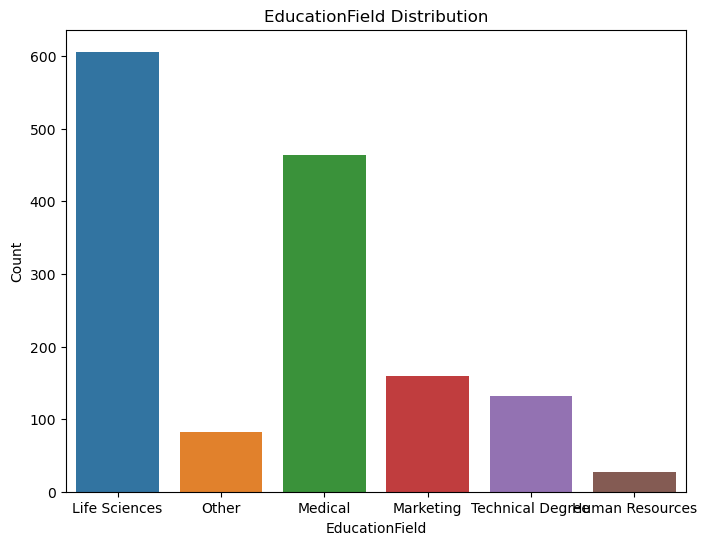

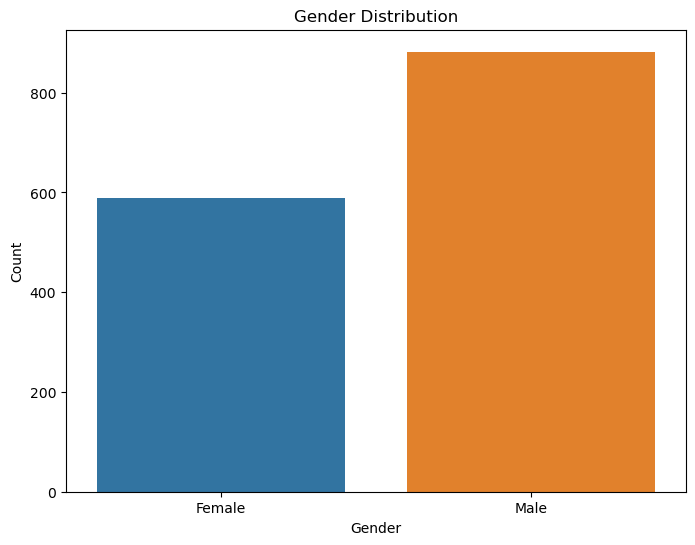

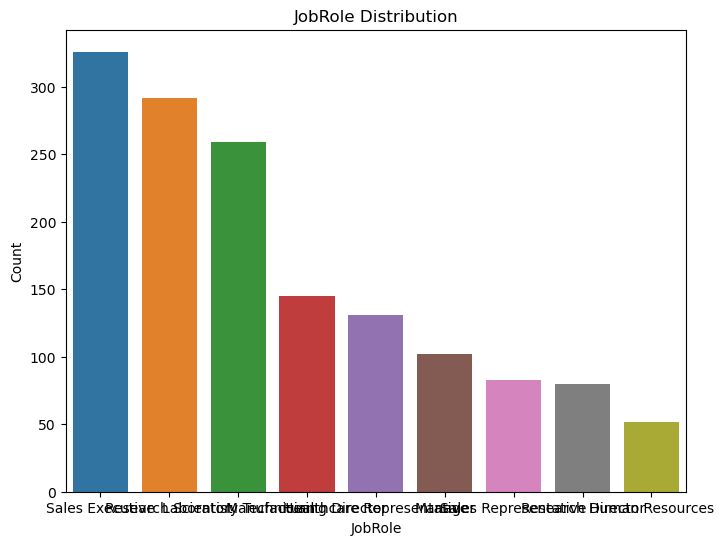

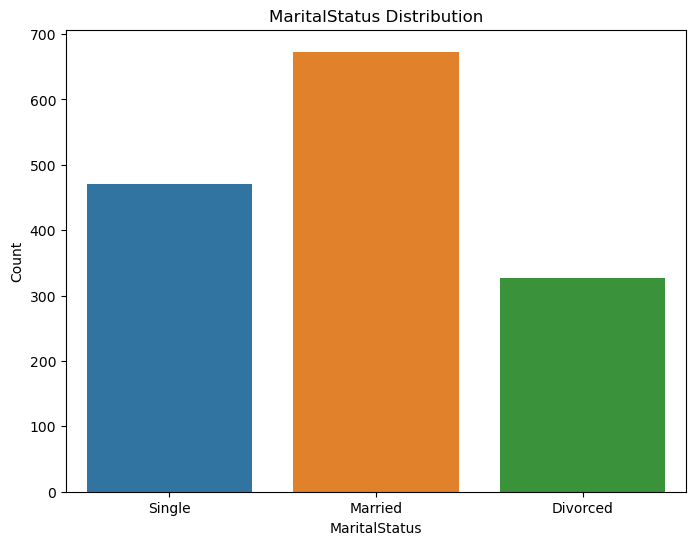

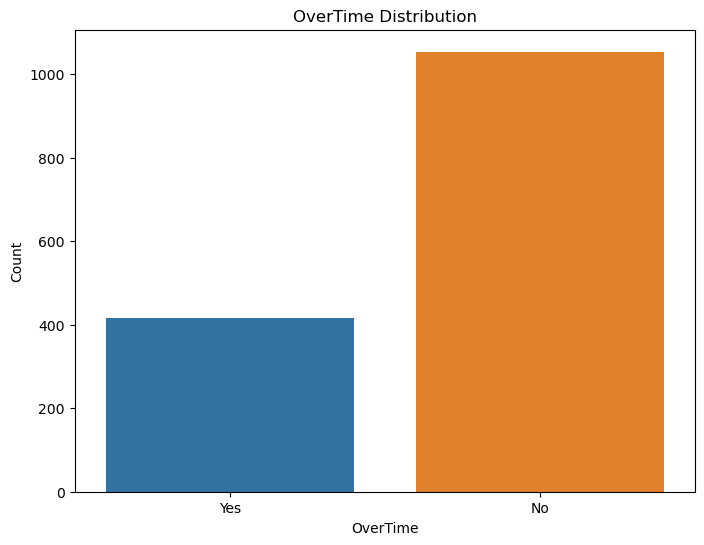

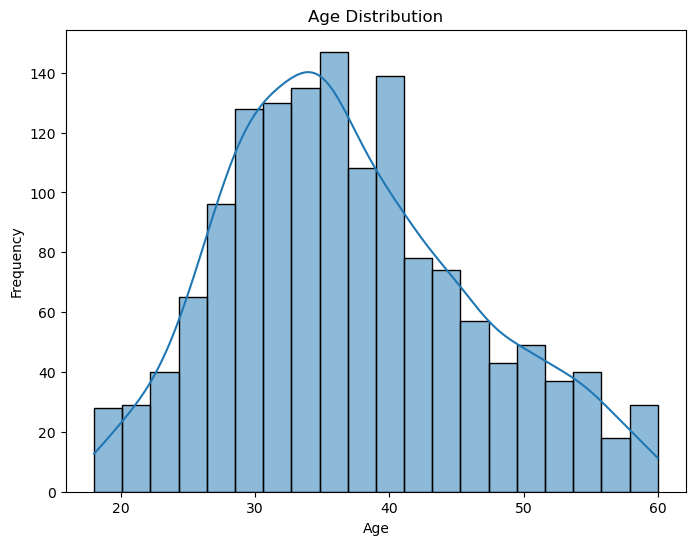

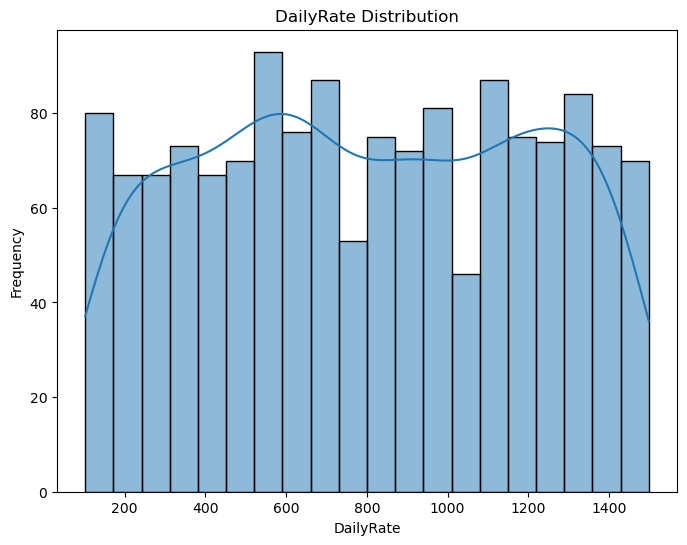

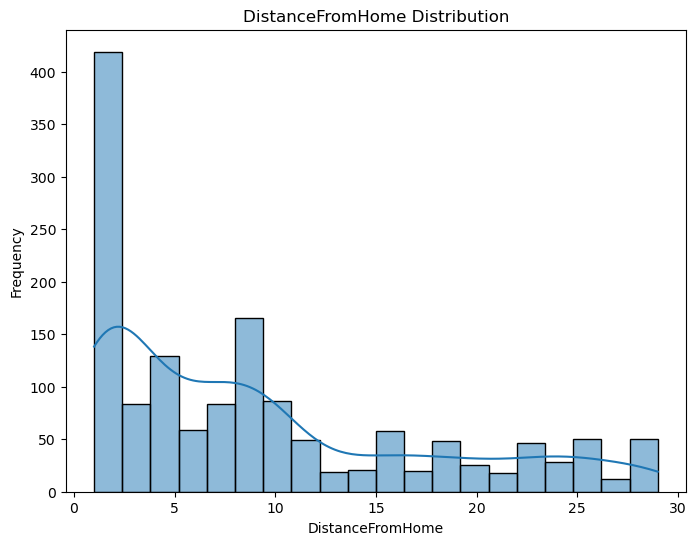

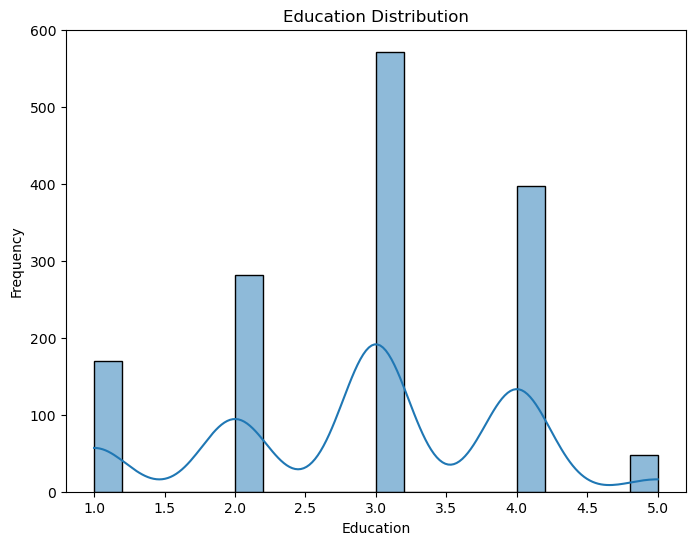

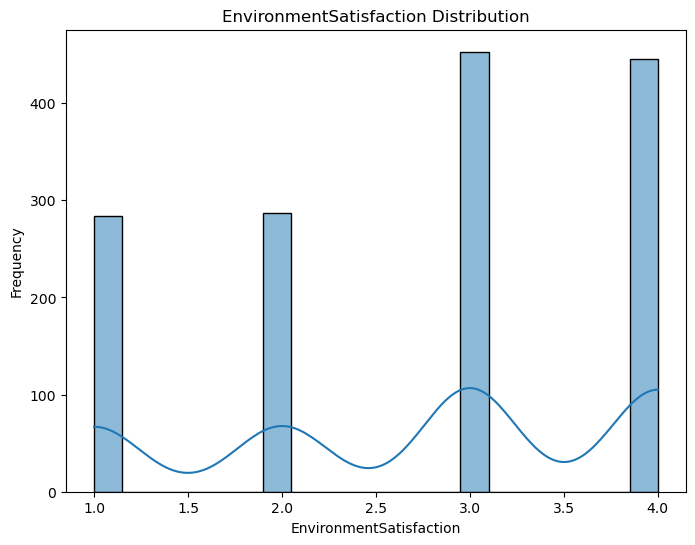

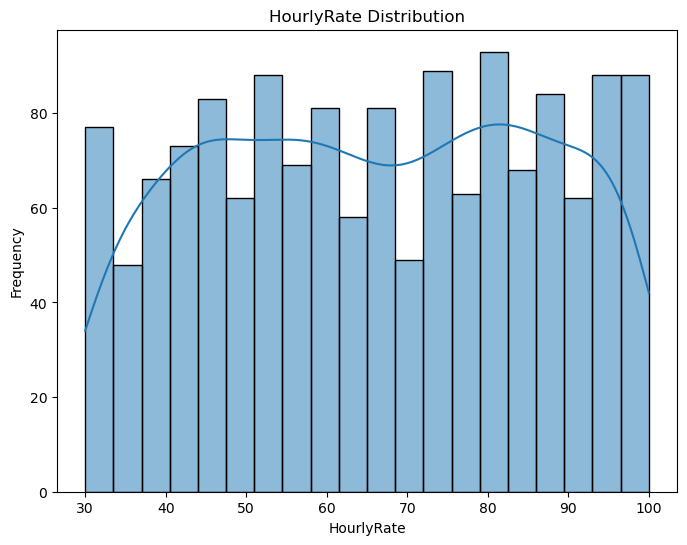

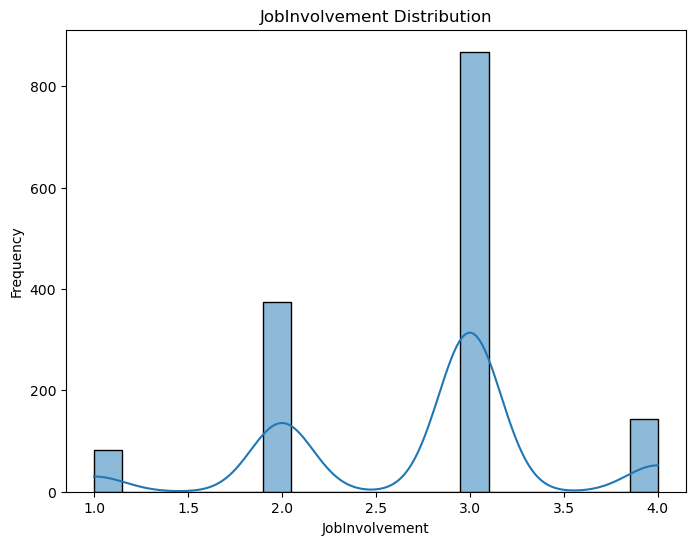

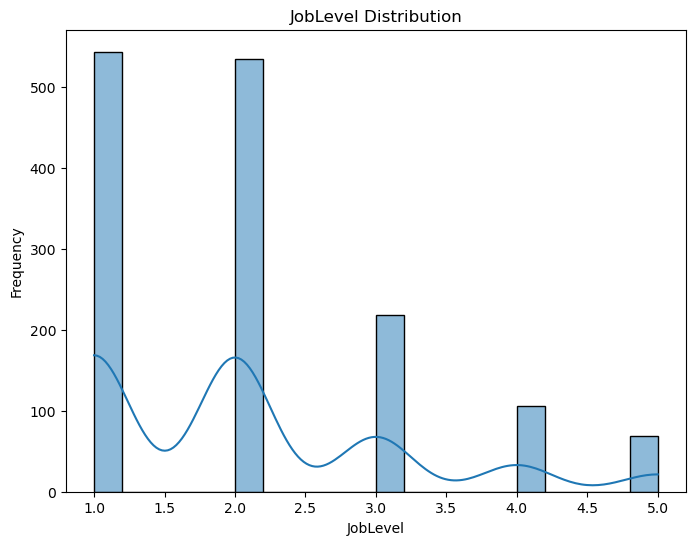

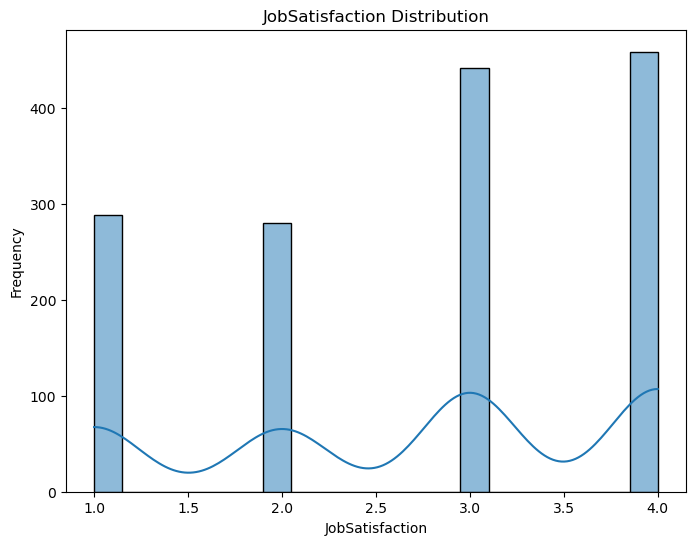

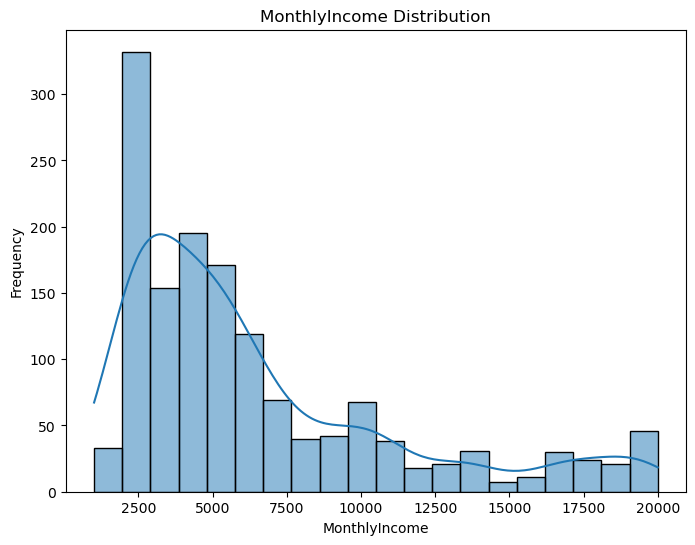

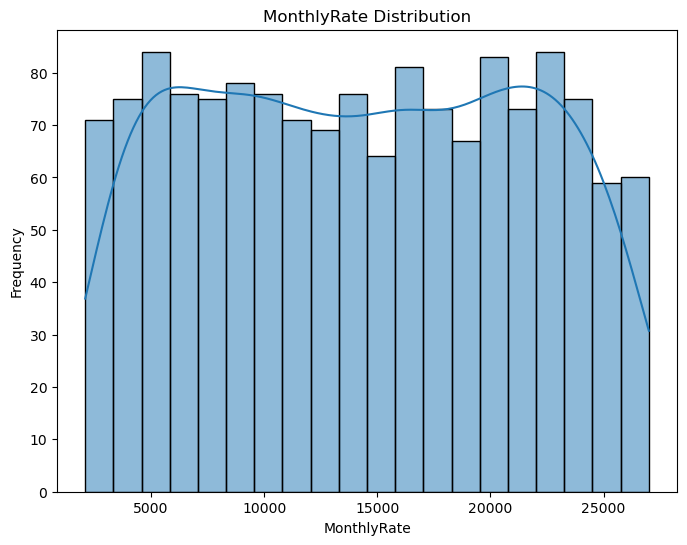

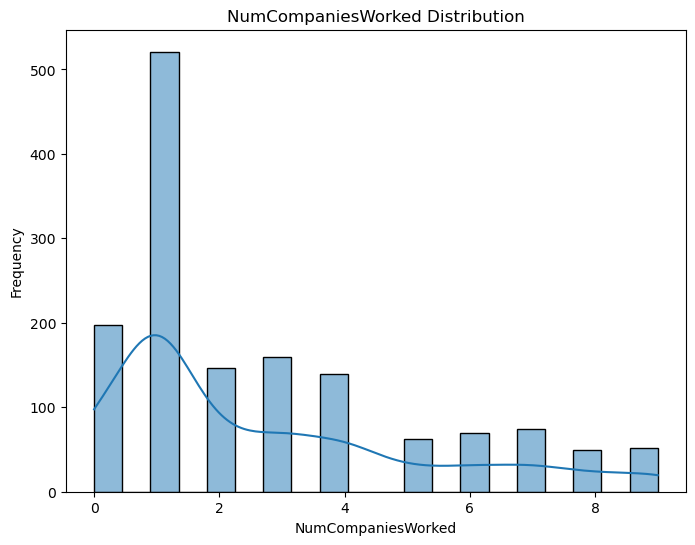

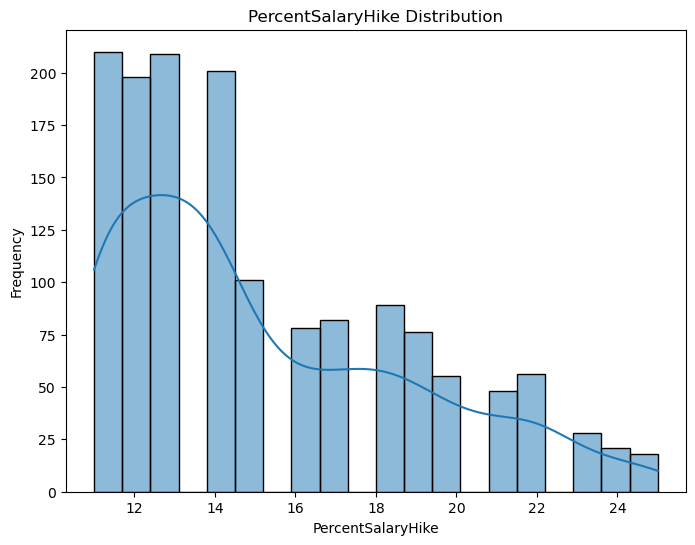

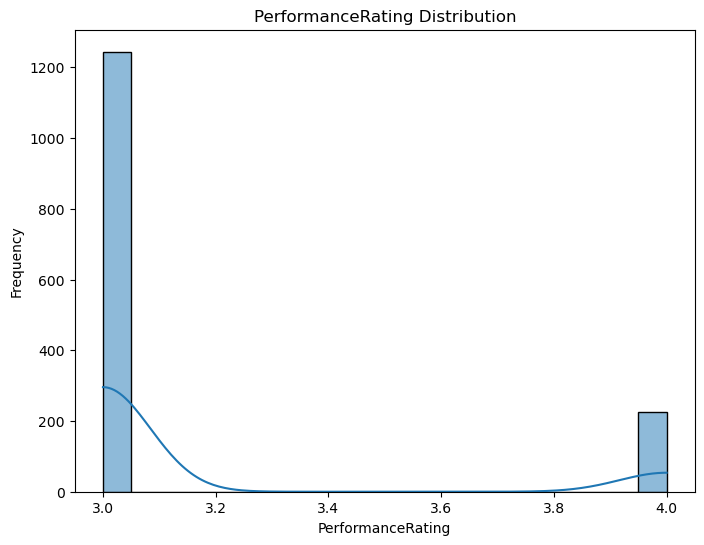

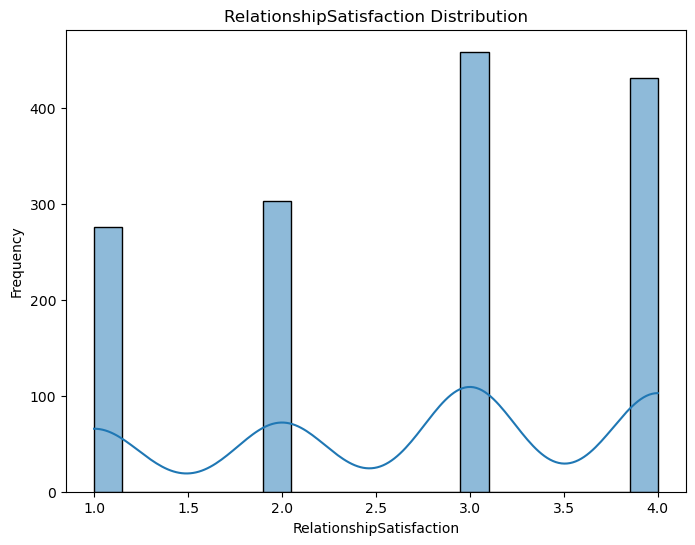

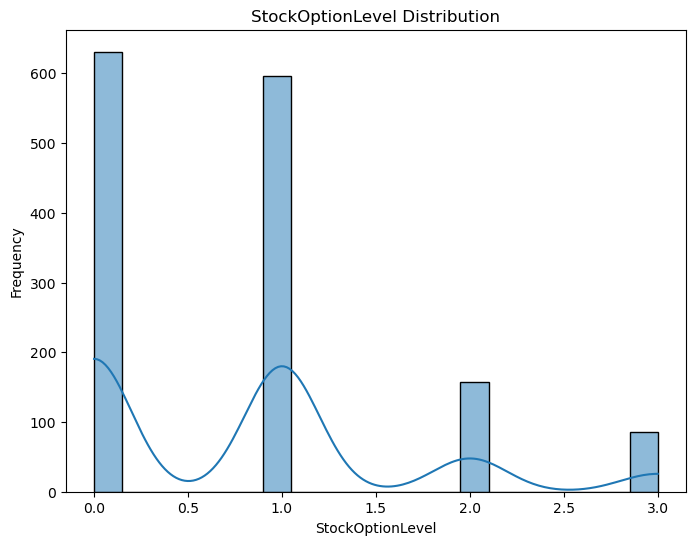

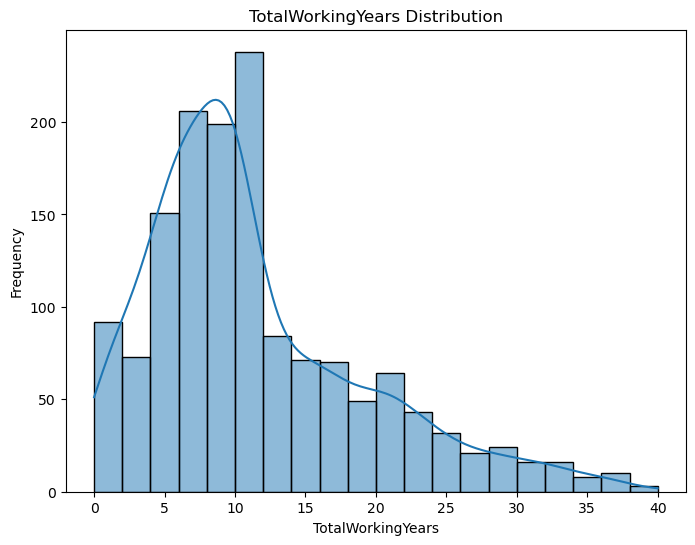

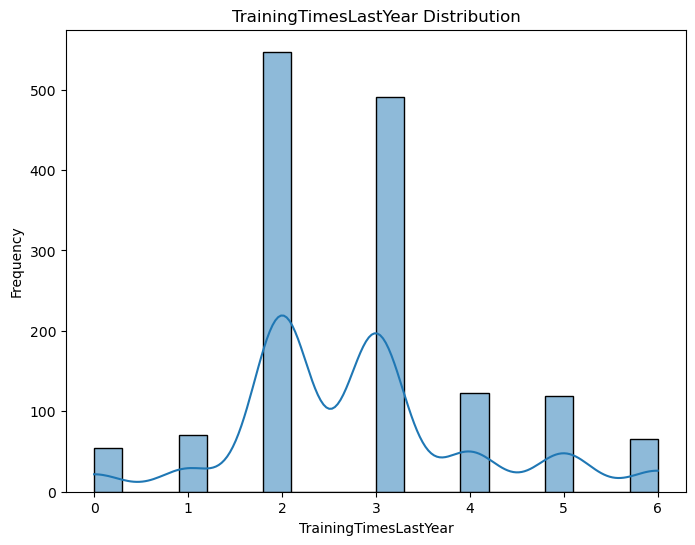

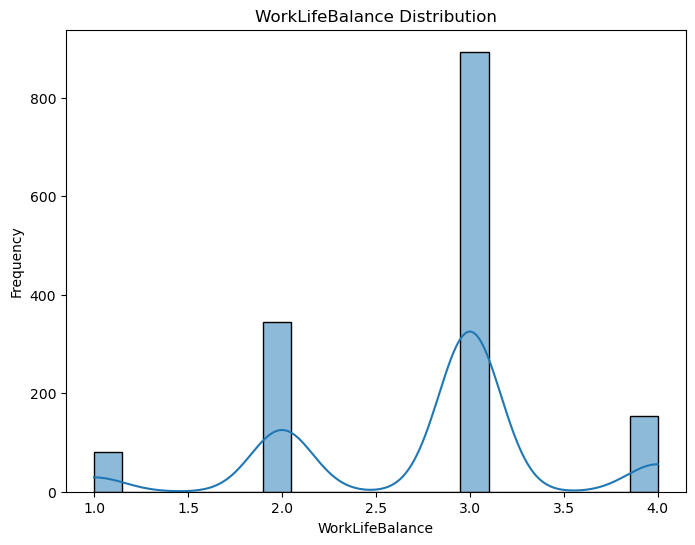

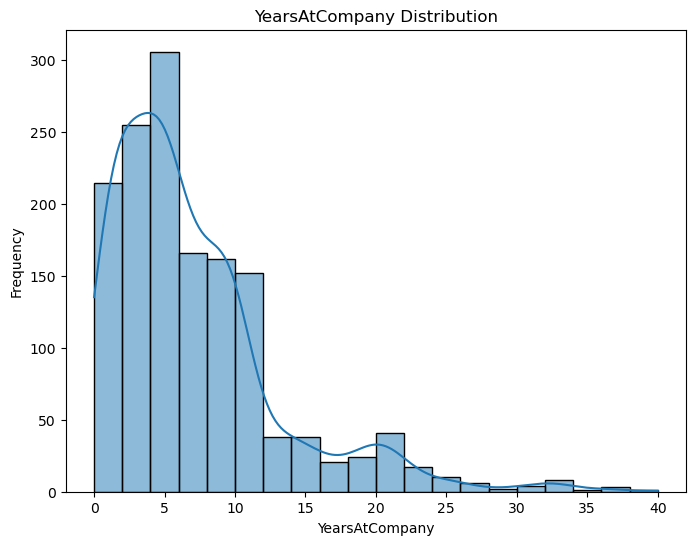

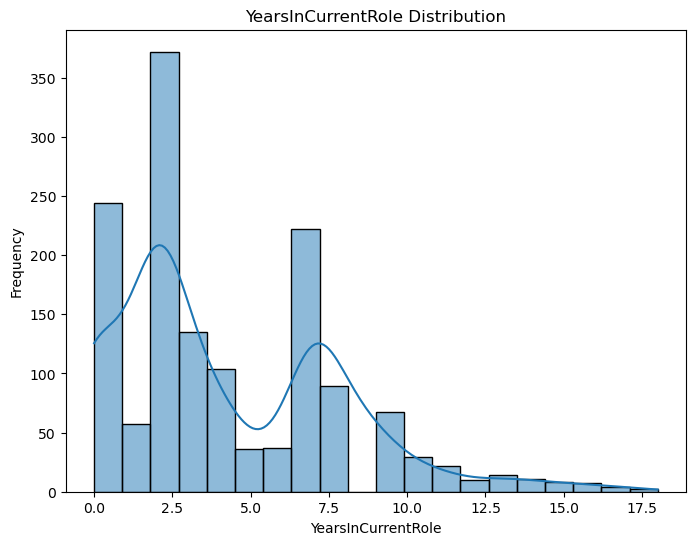

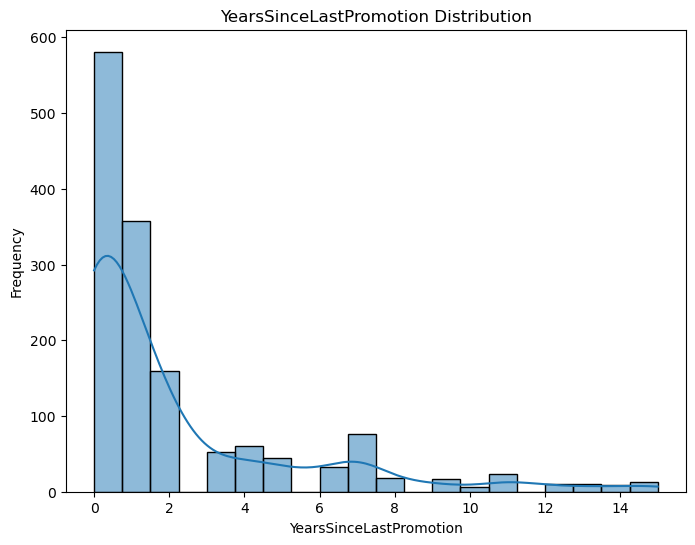

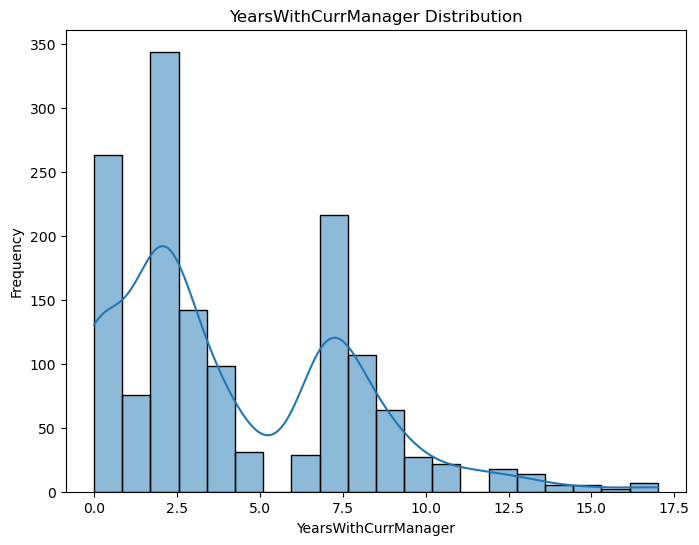

In [62]:
#Plotting categorical & numerical columns to see what data looks like visually
create_plots(df, categorical_columns)
create_plots(df, numerical_columns)

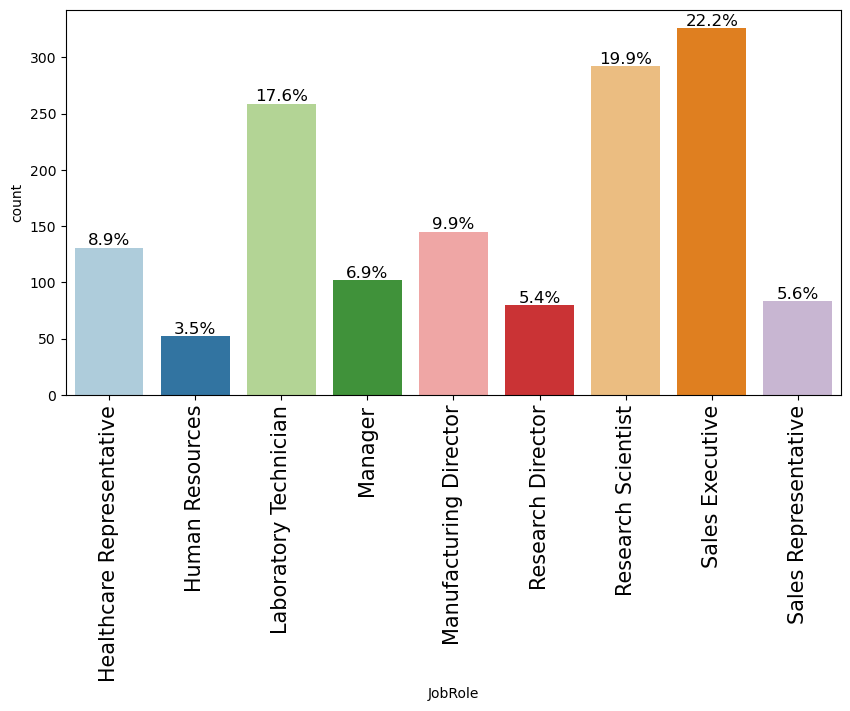

In [63]:
#
labeled_barplot(df, "JobRole", perc=True) 

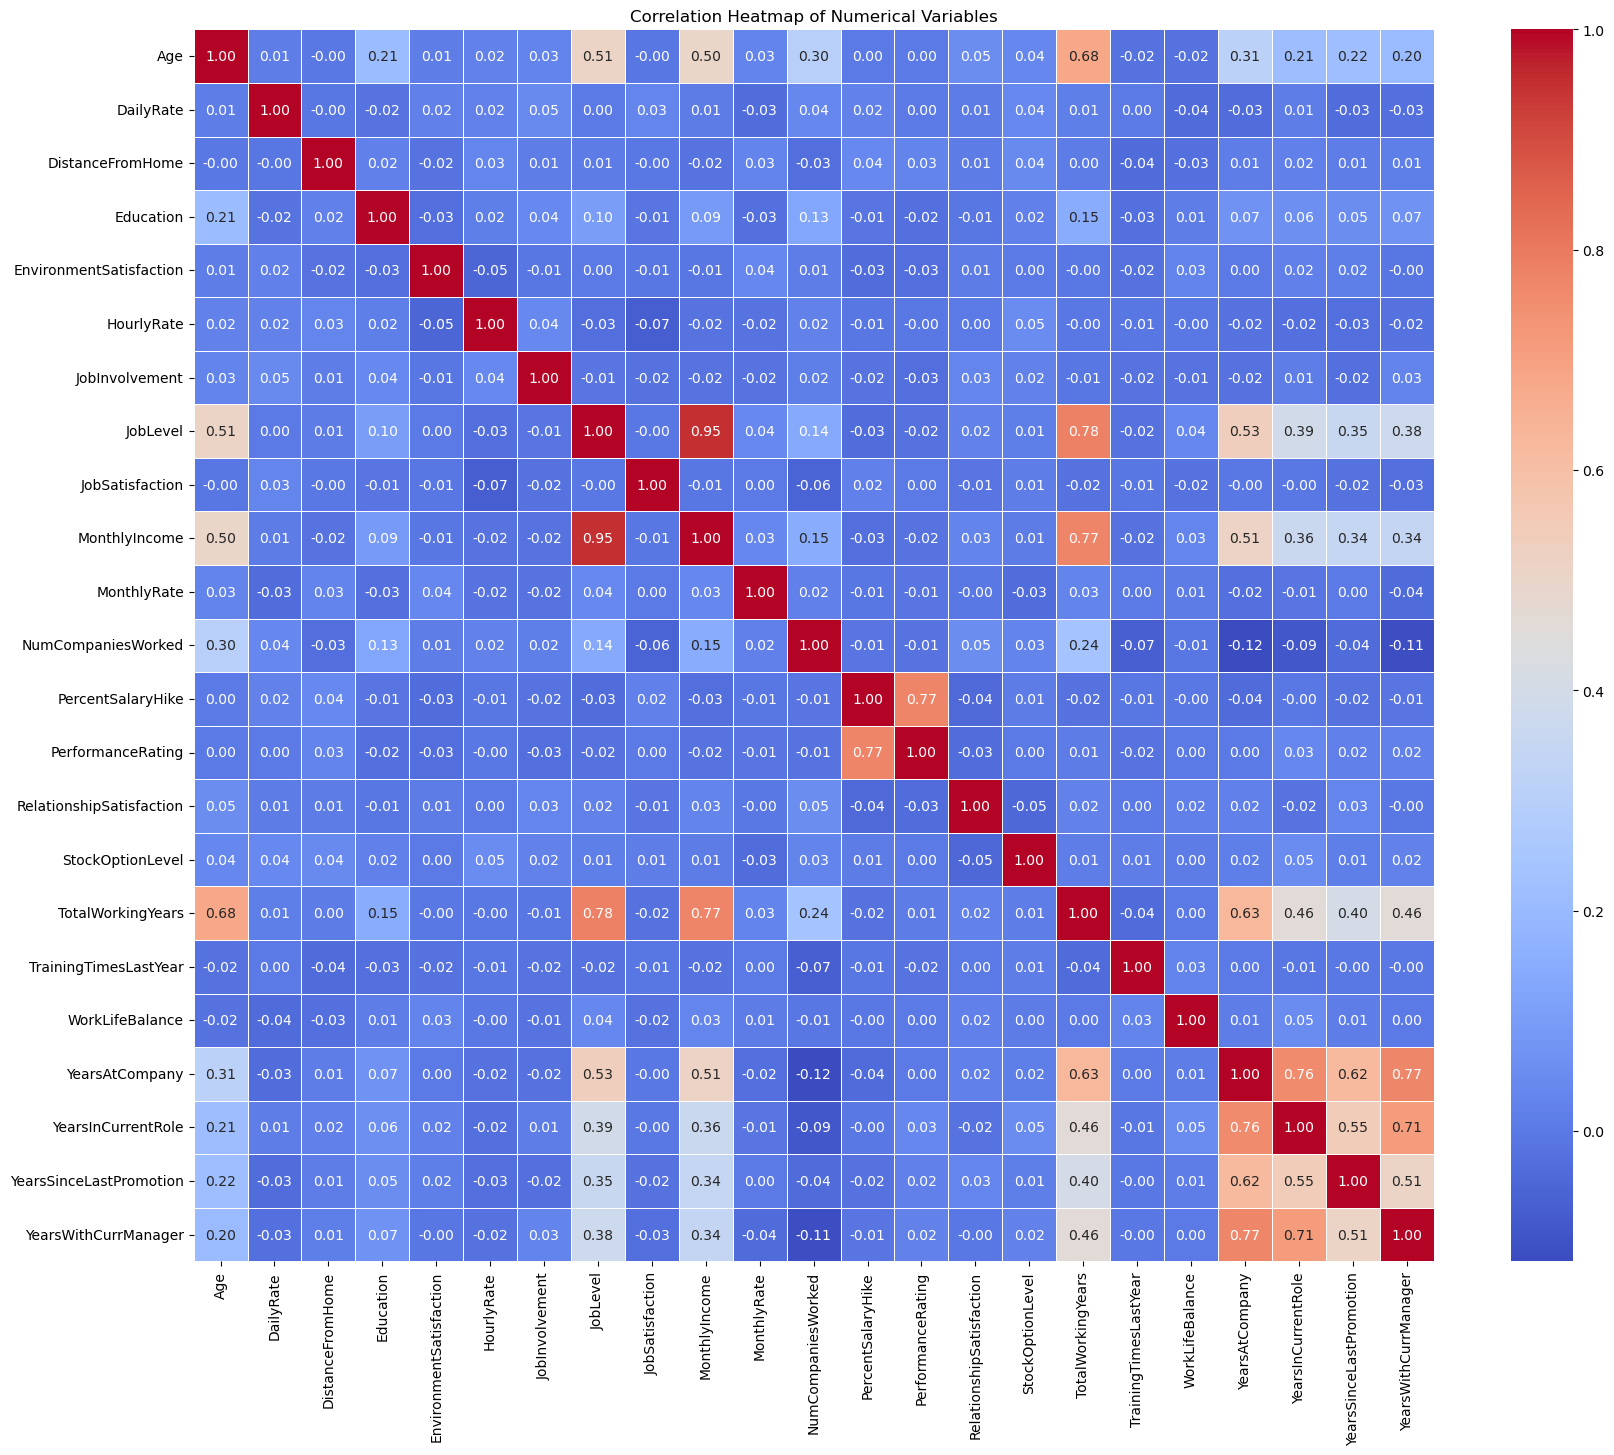

In [64]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Replace Yes and No with 1 and 0 and change datatype

In [66]:
df["Attrition"].replace("Yes", "1", inplace=True)
df["Attrition"].replace("No", "0", inplace=True)

In [67]:
df.Attrition=df.Attrition.astype("float64")

Plot numerical values

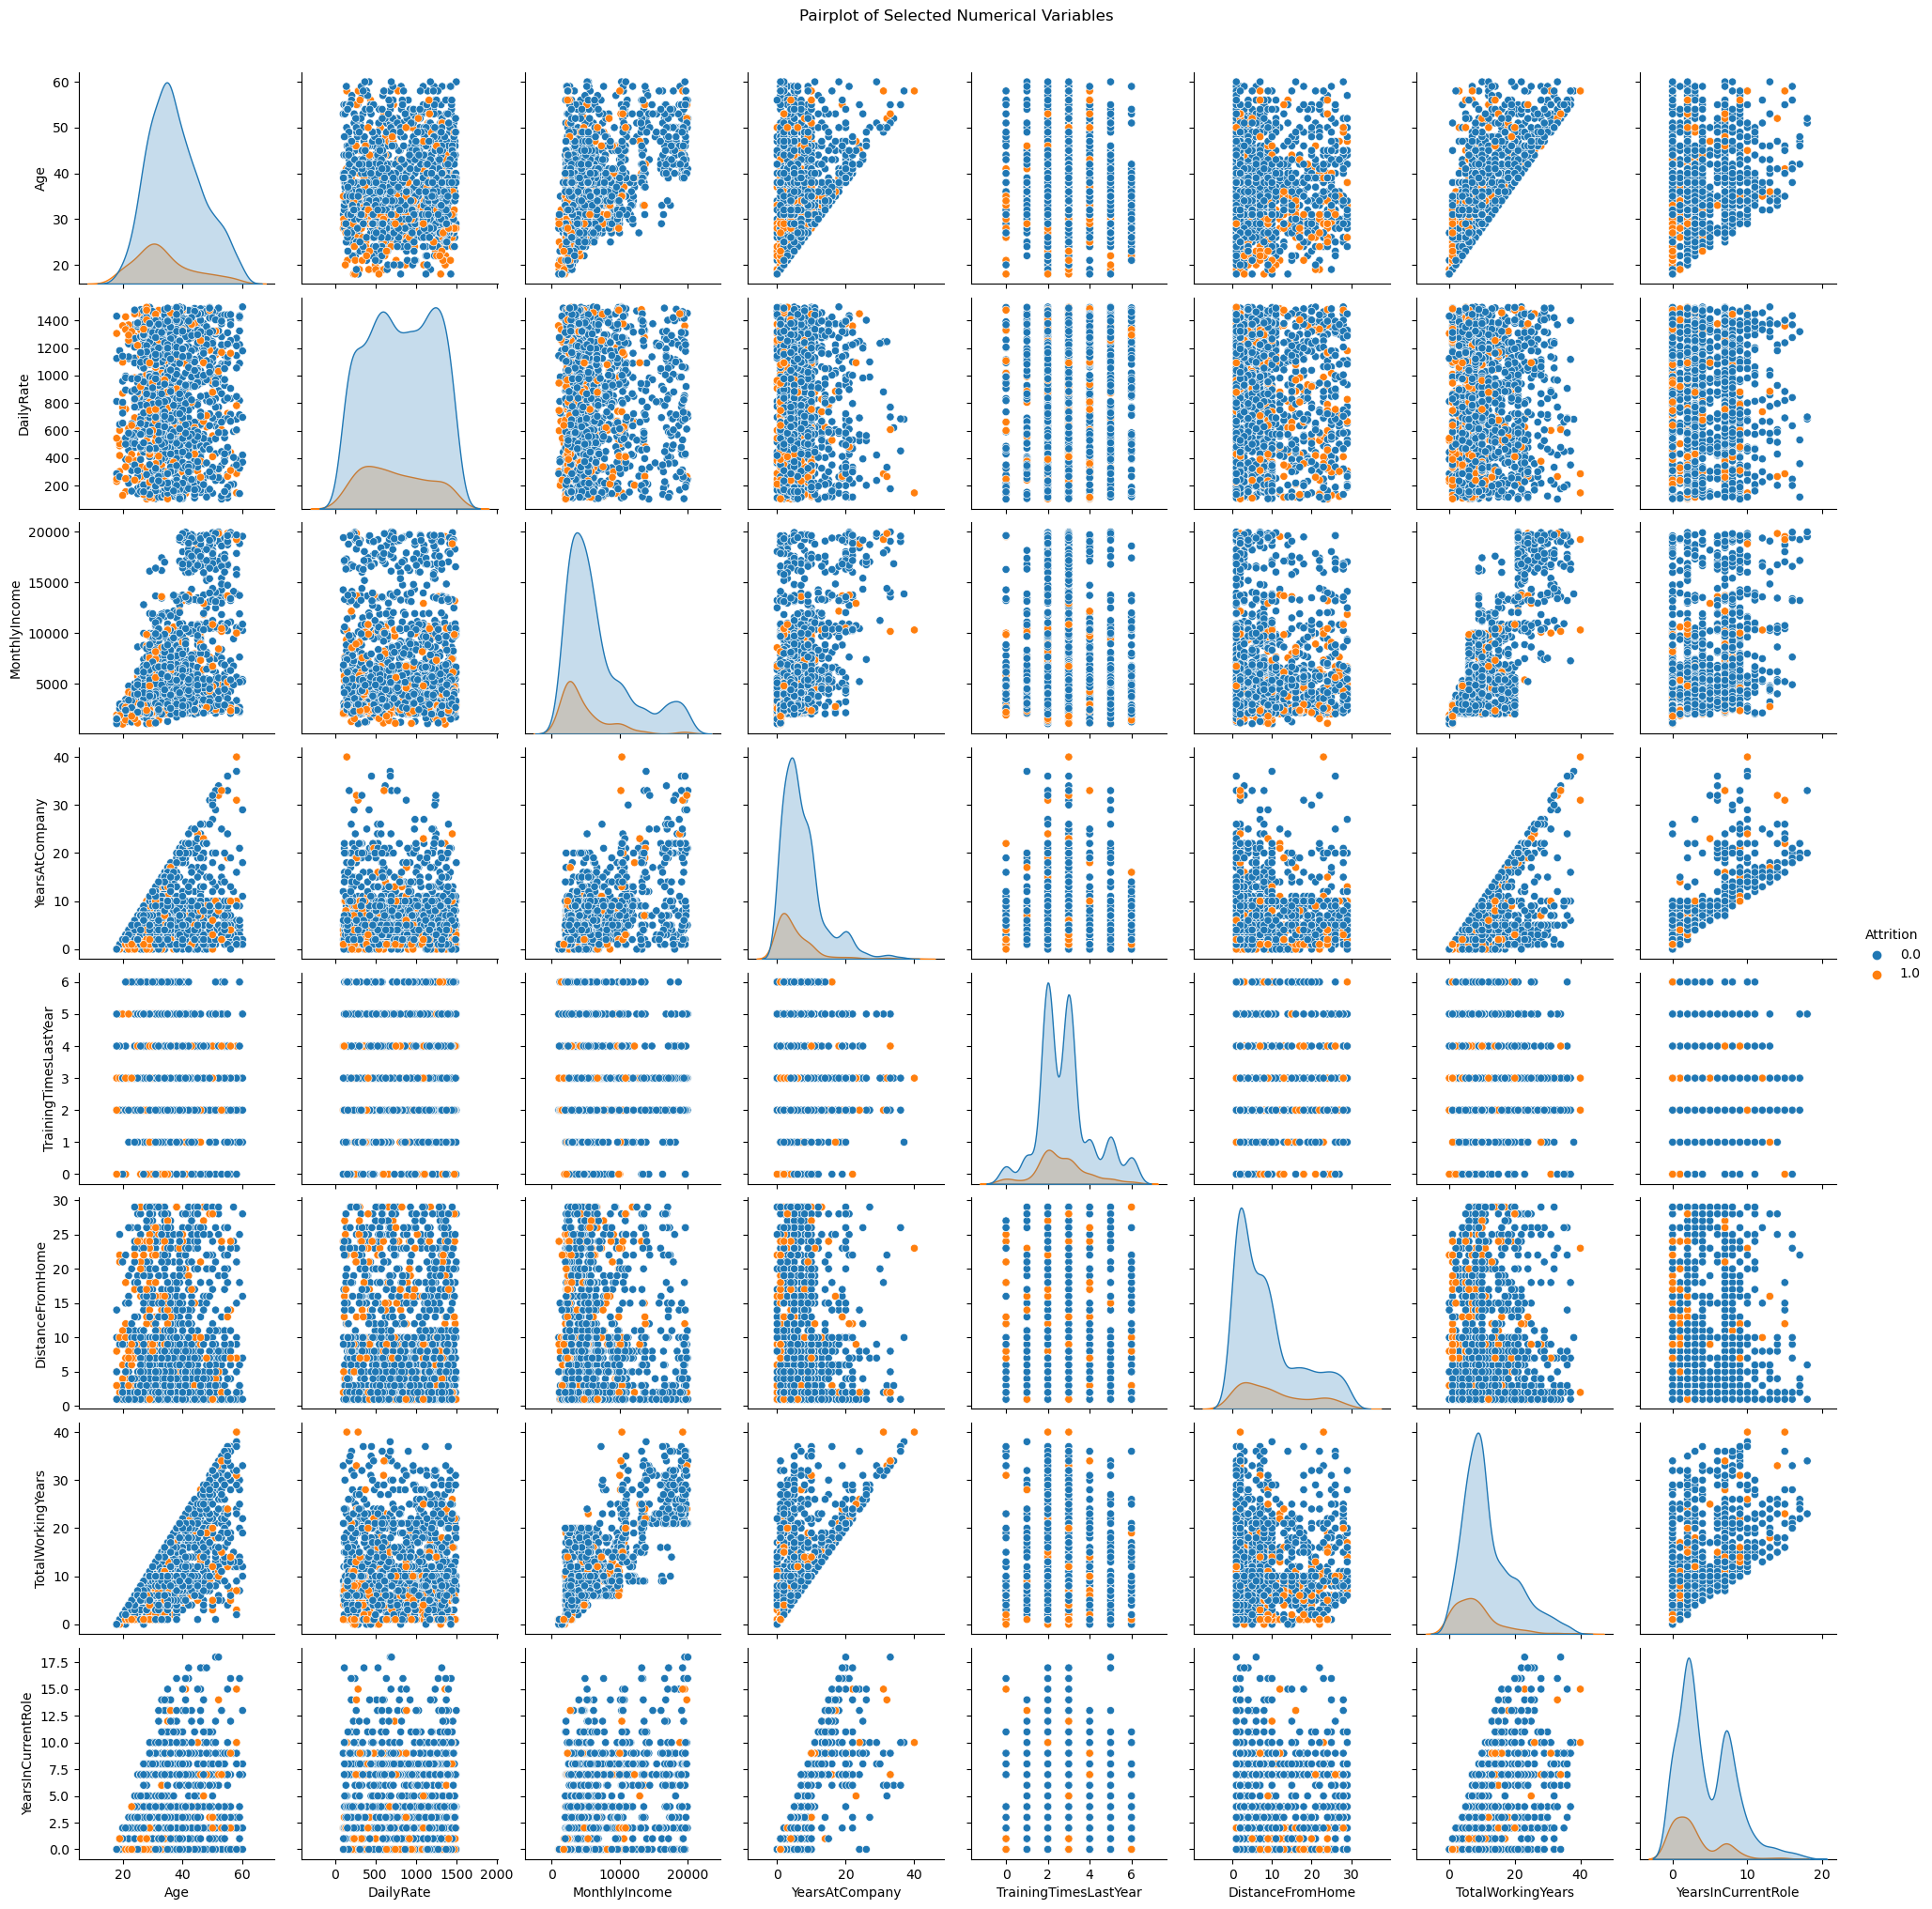

In [68]:
selected_numerical_columns = ['Age', 'DailyRate', 'MonthlyIncome', 'YearsAtCompany', "TrainingTimesLastYear", "DistanceFromHome", "TotalWorkingYears", "YearsInCurrentRole"]
sns.pairplot(df, vars=selected_numerical_columns, hue='Attrition')
plt.suptitle('Pairplot of Selected Numerical Variables', y=1.02)
plt.show()

Create boxplots

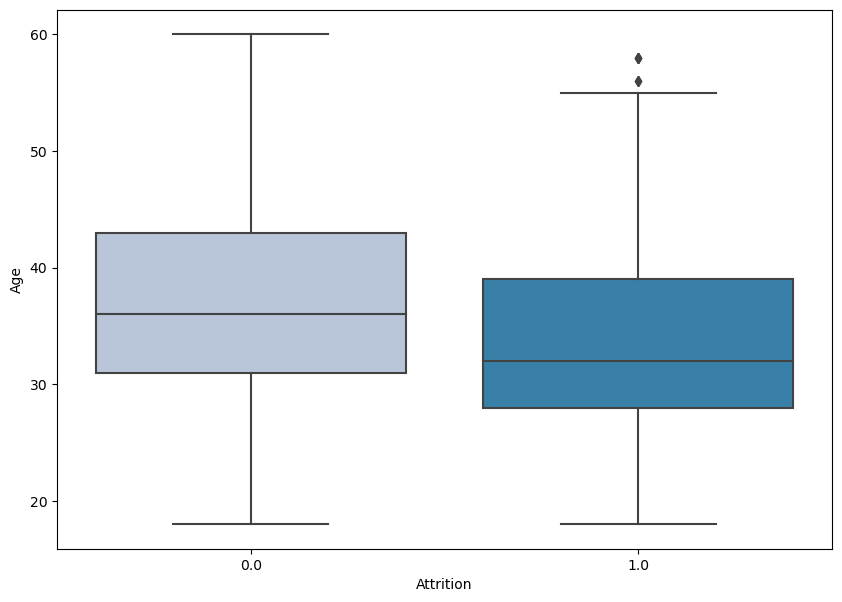

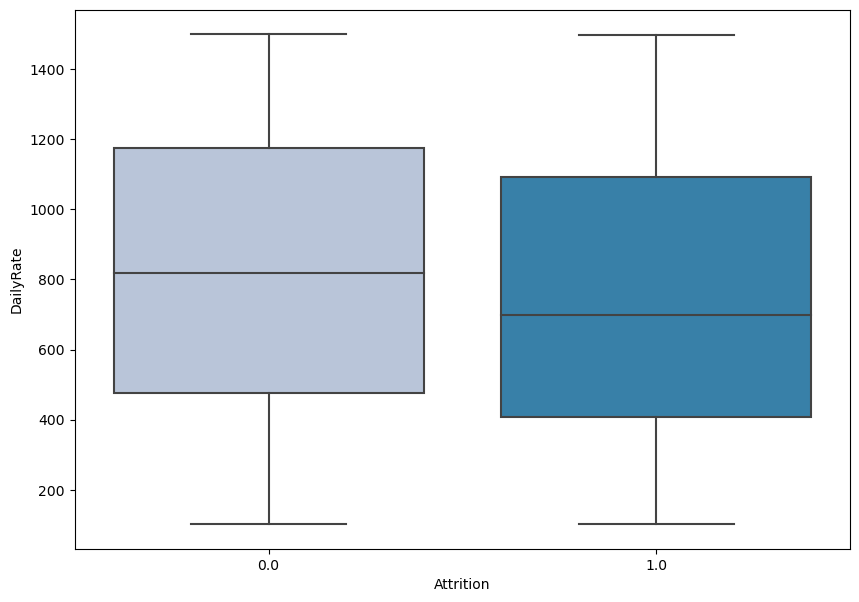

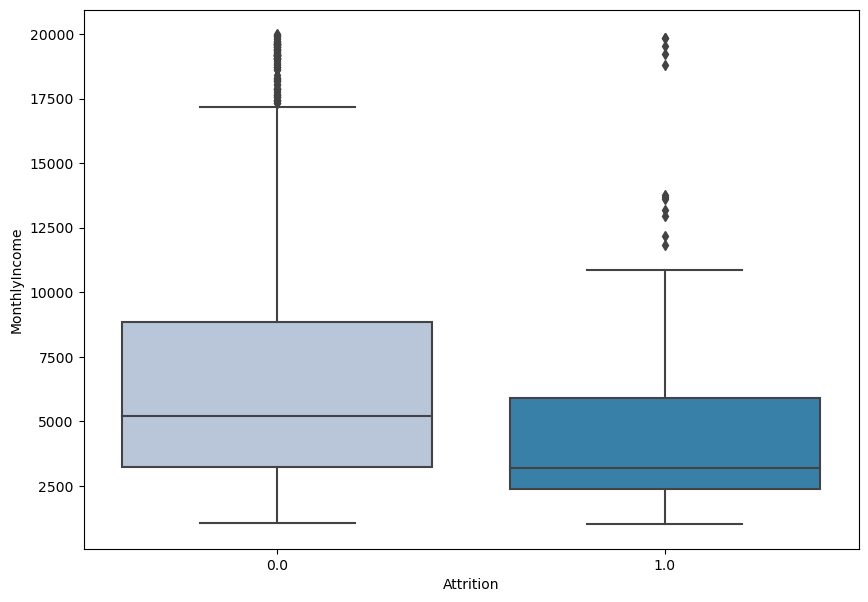

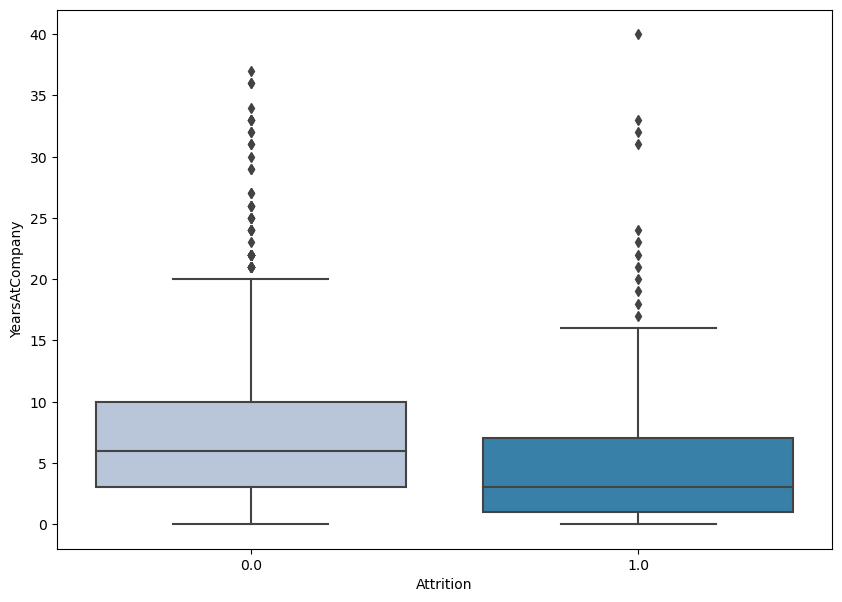

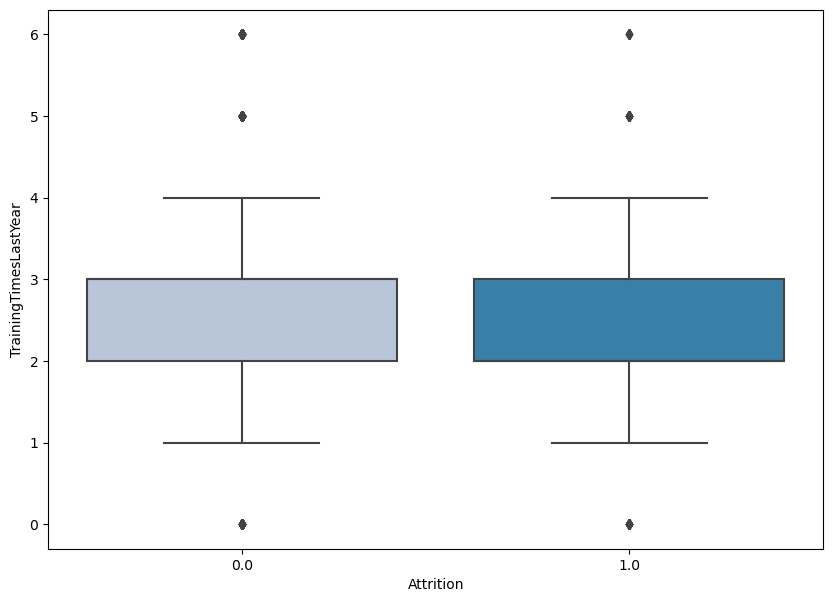

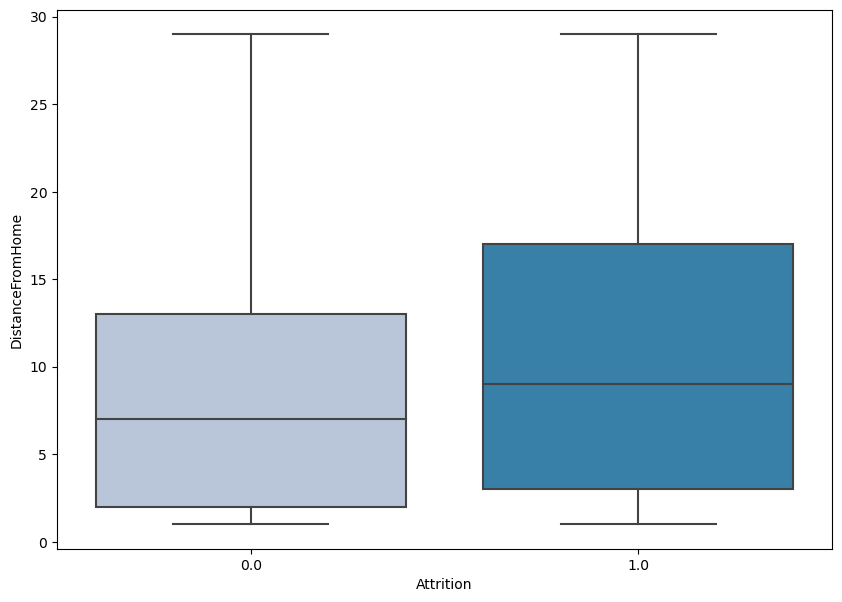

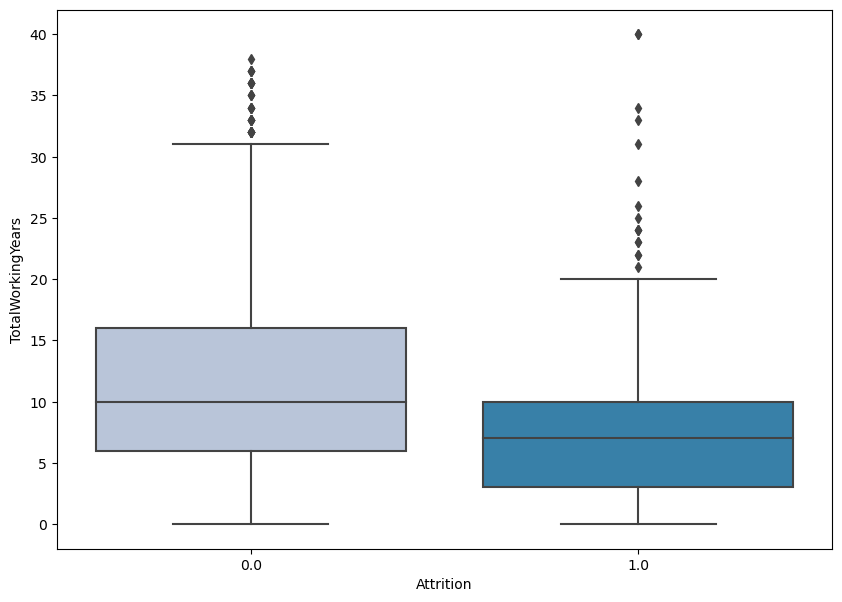

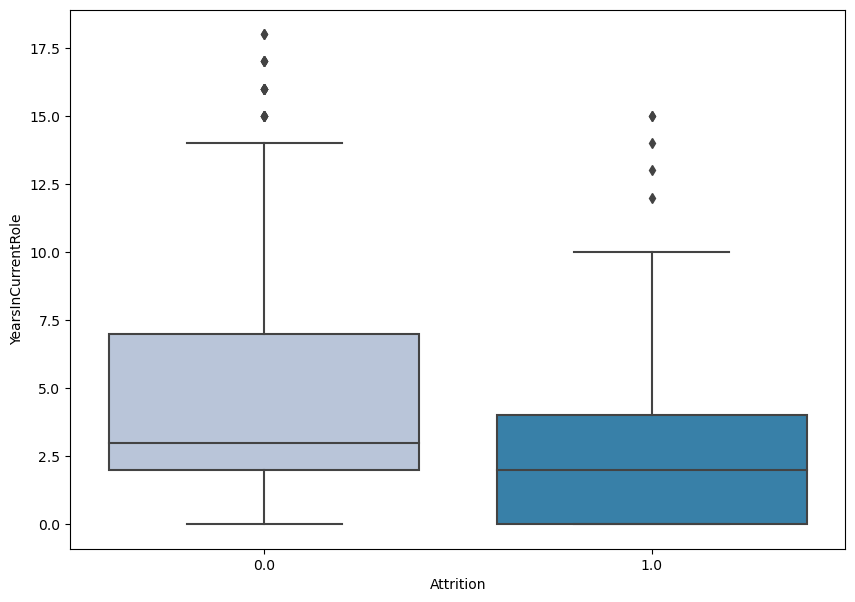

In [22]:
boxplot("Age")
boxplot("DailyRate")
boxplot("MonthlyIncome")
boxplot("YearsAtCompany")
boxplot("TrainingTimesLastYear")
boxplot("DistanceFromHome")
boxplot("TotalWorkingYears")
boxplot("YearsInCurrentRole")

###### Create dummies

In [69]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],drop_first=True)

###### Separating the data into predictor and target variables

In [70]:
X = df.drop(["Attrition"], axis=1)
Y = df["Attrition"]

In [71]:
X.sample(10)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
393    34       1381                 4          4                        3   
705    39        903                 2          5                        1   
1113   32       1200                 1          4                        4   
1110   35        104                 2          3                        1   
307    38        849                25          2                        1   
1007   29        337                14          1                        3   
319    32        588                 8          2                        3   
1416   38       1321                 1          4                        4   
807    38        770                10          4                        3   
123    51        684                 6          3                        1   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
393           72               3         2                3           6538   
705           41               4         3                3           7880   
1113          62               3         2                1           4087   
1110          69               3         1                1           2074   
307           81               2         3                2          12061   
1007          84               3         3                4           7553   
319           65               2         2                2           5228   
1416          86               3         2                2           4440   
807           73               2         3                3           8740   
123           51               3         5                3          19537   

      ...  JobRole_Laboratory Technician  JobRole_Manager  \
393   ...                              0                0   
705   ...                              0                0   
1113  ...                              0                0   
1110  ...                              1                0   
307   ...                              0                0   
1007  ...                              0                0   
319   ...                              0                0   
1416  ...                              0                0   
807   ...                              0                0   
123   ...                              0                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
393                                0                          0   
705                                0                          0   
1113                               0                          0   
1110                               0                          0   
307                                0                          1   
1007                               0                          0   
319                                0                          0   
1416                               0                          0   
807                                0                          0   
123                                0                          1   

      JobRole_Research Scientist  JobRole_Sales Executive  \
393                            0                        1   
705                            0                        1   
1113                           1                        0   
1110                           0                        0   
307                            0                        0   
1007                           0                        0   
319                            0                        1   
1416                           0                        1   
807                            0                        1   
123                            0                        0   

      JobRole_Sales Representative  MaritalStatus_Married  \
393                              0                      1   
705                              0                      0   
1113                   

###### Splitting data into training and test set with the use of stratify argument.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
) 
print(X_train.shape, X_test.shape)

(1029, 44) (441, 44)


In [73]:
print(Y.value_counts(1))
print(y_train.value_counts(1))
print(y_test.value_counts(1))

0.0    0.838776
1.0    0.161224
Name: Attrition, dtype: float64
0.0    0.838678
1.0    0.161322
Name: Attrition, dtype: float64
0.0    0.839002
1.0    0.160998
Name: Attrition, dtype: float64


Create Decision Tree and check model performance

In [77]:
def model_performance_classification(model, predictors, target):
 
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred) 
    precision = precision_score(target, pred) 
    f1 = f1_score(target, pred)  

  
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [78]:
def make_confusion_matrix(model, predictors, target, figsize=(5, 5)):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

In [79]:
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.77551  0.366197      0.325  0.344371


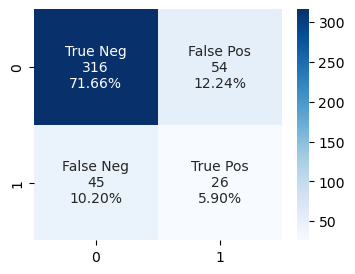

In [80]:
dTree_model_train_perf = model_performance_classification(dTree, X_train, y_train)
print("Training performance:\n", dTree_model_train_perf)
dTree_model_test_perf = model_performance_classification(dTree, X_test, y_test)
print("Testing performance:\n", dTree_model_test_perf)
make_confusion_matrix(dTree, X_test, y_test, figsize=(4, 3))

The model is overfitting

In [81]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_

In [82]:
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
MonthlyIncome                      0.091628
DailyRate                          0.080207
HourlyRate                         0.070748
DistanceFromHome                   0.070635
OverTime_Yes                       0.068648
StockOptionLevel                   0.059645
YearsAtCompany                     0.053779
Age                                0.052132
PercentSalaryHike                  0.045287
JobSatisfaction                    0.045275
TotalWorkingYears                  0.041652
MonthlyRate                        0.040585
TrainingTimesLastYear              0.040443
JobInvolvement                     0.020850
EnvironmentSatisfaction            0.018122
NumCompaniesWorked                 0.016581
YearsInCurrentRole                 0.016521
JobRole_Research Scientist         0.014931
Department_Research & Development  0.014366
Education                          0.014309
YearsSinceLastPromotion            0.014007
YearsWithCurrManager            

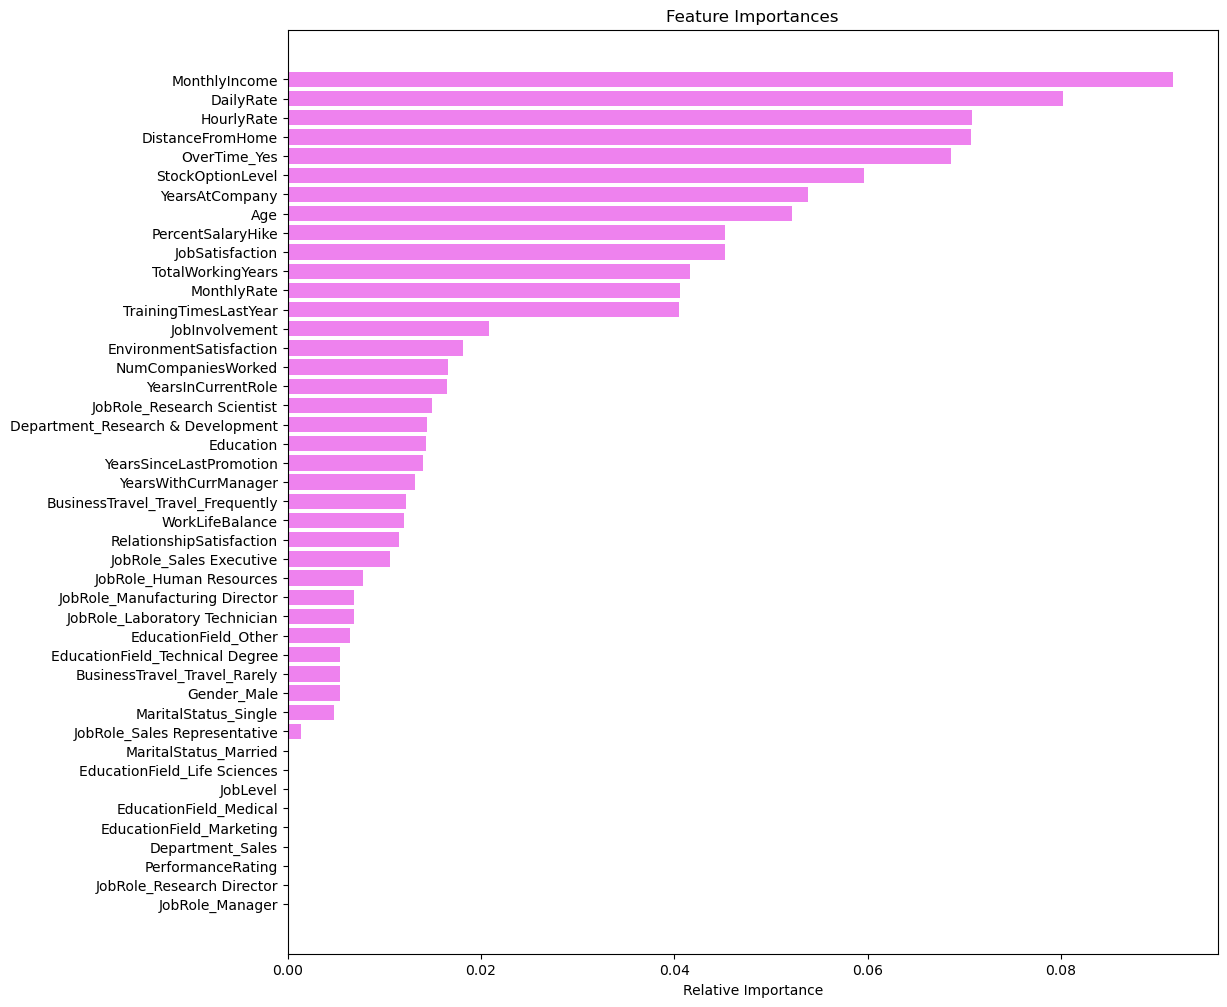

In [83]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [84]:
dTree_short = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1)
dTree_short.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

Create a short decision tree

Training performance:
    Accuracy   Recall  Precision        F1
0  0.879495  0.39759   0.733333  0.515625
Testing performance:
    Accuracy    Recall  Precision       F1
0   0.84127  0.338028   0.510638  0.40678


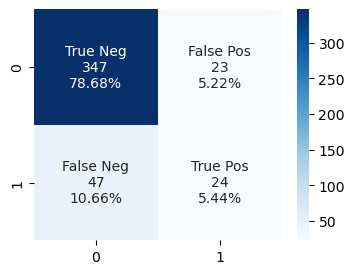

In [86]:
dTree_short_model_train_perf = model_performance_classification(
    dTree_short, X_train, y_train
)
print("Training performance:\n", dTree_short_model_train_perf)
dTree_short_model_test_perf = model_performance_classification(
    dTree_short, X_test, y_test
)
print("Testing performance:\n", dTree_short_model_test_perf)
make_confusion_matrix(dTree_short, X_test, y_test, figsize = (4,3))

The results of Recall (which is chosen as our goal measurement) is low

In [87]:
print(
    pd.DataFrame(
        dTree_short.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
OverTime_Yes                       0.245432
YearsAtCompany                     0.167469
StockOptionLevel                   0.163992
MonthlyIncome                      0.110529
Age                                0.075945
JobSatisfaction                    0.056310
JobRole_Research Scientist         0.053382
DailyRate                          0.048260
HourlyRate                         0.033641
EnvironmentSatisfaction            0.023037
TotalWorkingYears                  0.022004
JobRole_Laboratory Technician      0.000000
EducationField_Medical             0.000000
EducationField_Other               0.000000
EducationField_Technical Degree    0.000000
Gender_Male                        0.000000
JobRole_Human Resources            0.000000
JobRole_Manufacturing Director     0.000000
JobRole_Manager                    0.000000
EducationField_Life Sciences       0.000000
JobRole_Research Director          0.000000
JobRole_Sales Executive         

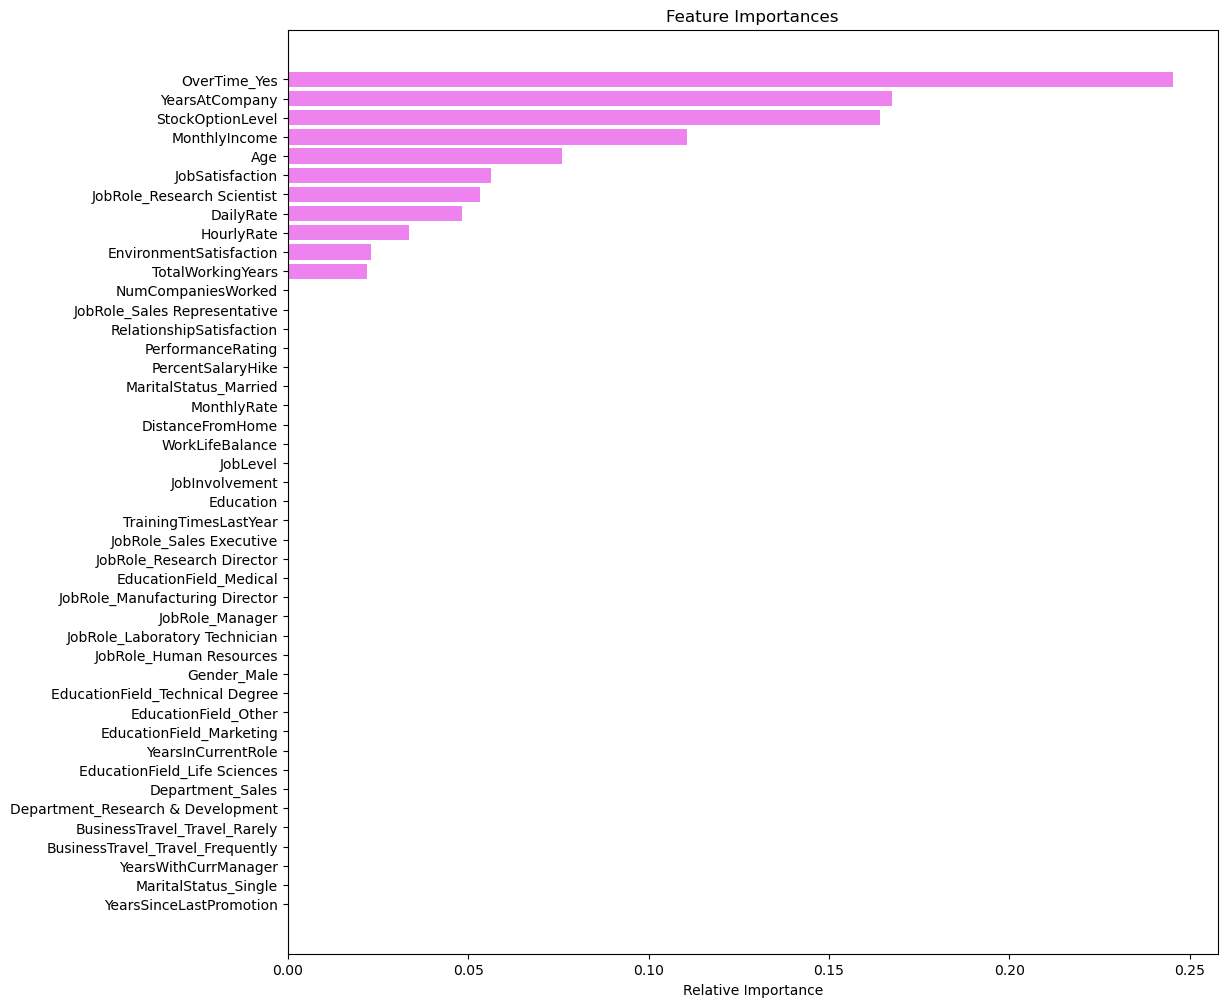

In [88]:
importances = dTree_short.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Create a tuned decision tree with reversed weights. "No", which is 0 is given a weight of 0.2 ("No" was 83.9% of the data). "Yes" will be 0.8.

In [89]:
dTree_tuned = DecisionTreeClassifier(
    class_weight={0: 0.2, 1: 0.8}, random_state=1
)  

parameters = {
    "max_depth": np.arange(2, 8, 1),
    "min_samples_leaf": [5, 7, 10],
    "max_leaf_nodes": [3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

scorer = metrics.make_scorer(
    metrics.recall_score
) 

grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

dTree_tuned = grid_obj.best_estimator_

dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.80758  0.753012   0.443262  0.558036
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.739229  0.704225   0.347222  0.465116


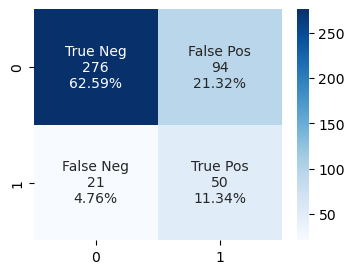

In [90]:
dTree_tuned_model_train_perf = model_performance_classification(
    dTree_tuned, X_train, y_train
)
print("Training performance:\n", dTree_tuned_model_train_perf)
dTree_tuned_model_test_perf = model_performance_classification(
    dTree_tuned, X_test, y_test
)
print("Testing performance:\n", dTree_tuned_model_test_perf)

make_confusion_matrix(dTree_tuned, X_test, y_test, figsize = (4,3))

Recall is better in this model and the model is not overfitting. 

The most important features in this model are stated below.

In [93]:
print(
    pd.DataFrame(
        dTree_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
StockOptionLevel                   0.226218
OverTime_Yes                       0.173343
YearsAtCompany                     0.130547
JobLevel                           0.098455
DistanceFromHome                   0.091578
Age                                0.088723
JobSatisfaction                    0.075451
MonthlyRate                        0.041840
EducationField_Life Sciences       0.040566
EnvironmentSatisfaction            0.033278
JobInvolvement                     0.000000
JobRole_Manager                    0.000000
EducationField_Medical             0.000000
EducationField_Other               0.000000
EducationField_Technical Degree    0.000000
Gender_Male                        0.000000
JobRole_Human Resources            0.000000
JobRole_Laboratory Technician      0.000000
JobRole_Research Director          0.000000
JobRole_Manufacturing Director     0.000000
JobRole_Research Scientist         0.000000
JobRole_Sales Executive         

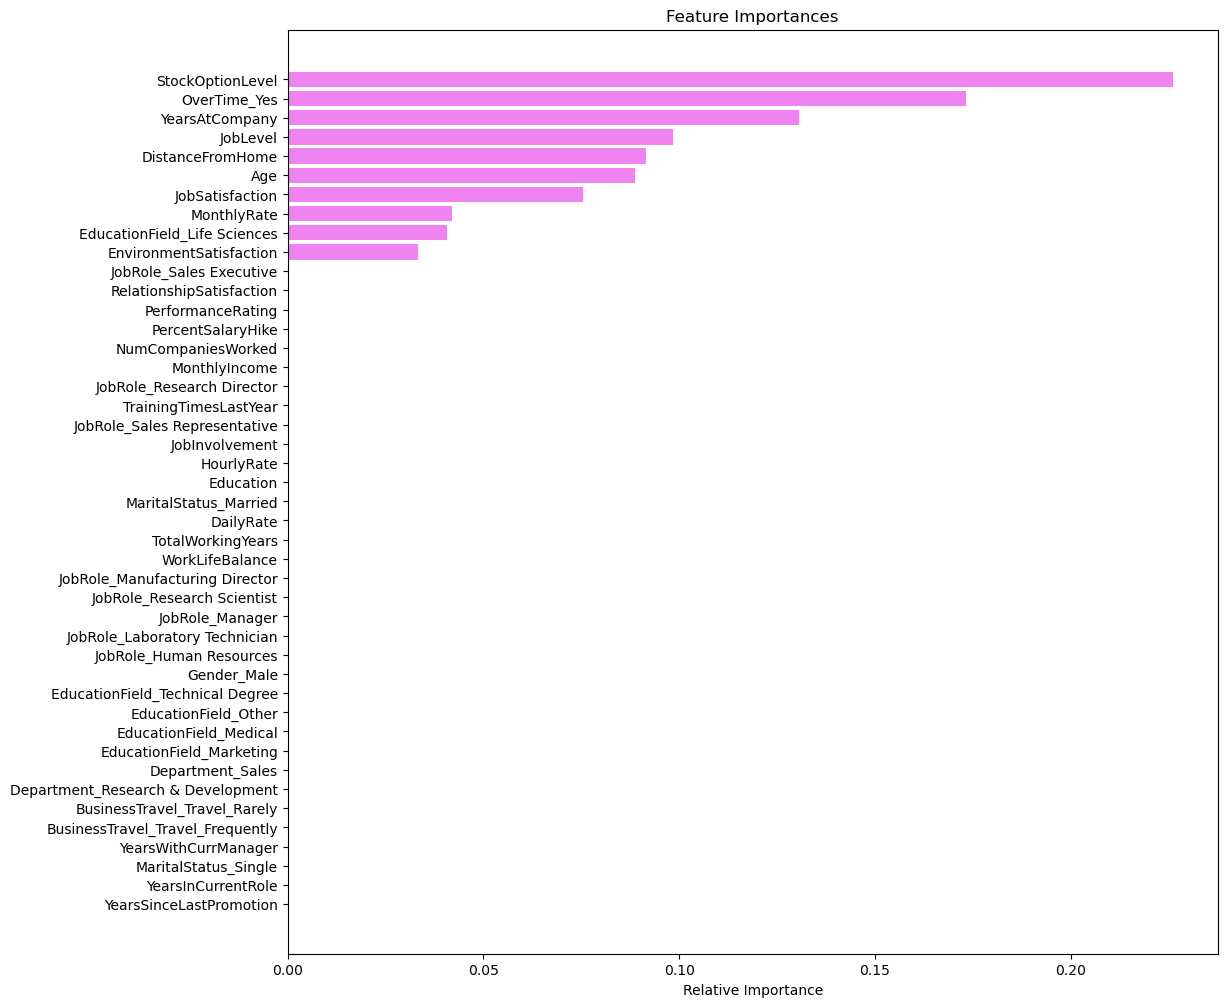

In [94]:
importances = dTree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

###### Stock option level, overtime, Years at the company, job level, distance from home, age and job satisfaction are the most important features when it comes to employee attrition.

Create bagging model

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985423  0.921687   0.987097  0.953271
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.866213  0.338028   0.666667  0.448598


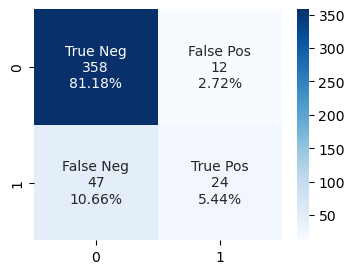

In [95]:
bagging_model = BaggingClassifier(random_state=1)
bagging_model.fit(X_train, y_train)

bagging_model_train_perf = model_performance_classification(
    bagging_model, X_train, y_train
)
print("Training performance:\n", bagging_model_train_perf)

bagging_model_test_perf = model_performance_classification(
    bagging_model, X_test, y_test
)
print("Testing performance:\n", bagging_model_test_perf)

make_confusion_matrix(bagging_model, X_test, y_test, figsize=(4, 3))

The recall results are not as good in this model. 

Create tuned bagging model. 

In [96]:
bagging_model_tuned = BaggingClassifier(random_state=1)

parameters = {
    "max_samples": [0.5, 0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50, 60, 100],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_model_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_model_tuned = grid_obj.best_estimator_

bagging_model_tuned.fit(X_train, y_train)

BaggingClassifier(max_samples=0.9, n_estimators=60, random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.854875  0.267606   0.612903  0.372549


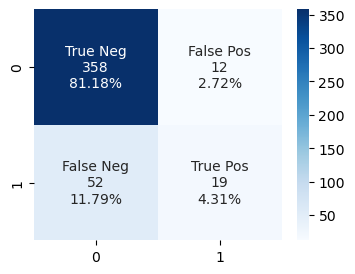

In [97]:
bagging_model_tuned_train_perf = model_performance_classification(
    bagging_model_tuned, X_train, y_train
)
print("Training performance:\n", bagging_model_tuned_train_perf)
bagging_model_tuned_test_perf = model_performance_classification(
    bagging_model_tuned, X_test, y_test
)
print("Testing performance:\n", bagging_model_tuned_test_perf)


make_confusion_matrix(bagging_model_tuned, X_test, y_test, figsize=(4, 3))

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.863946  0.197183   0.823529  0.318182


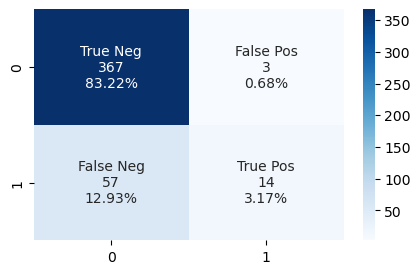

In [98]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

rf_model_train_perf = model_performance_classification(rf, X_train, y_train)
print("Training performance:\n", rf_model_train_perf)
rf_model_test_perf = model_performance_classification(rf, X_test, y_test)
print("Testing performance:\n", rf_model_test_perf)

make_confusion_matrix(rf, X_test, y_test, figsize=(5, 3))

The model is overfitting.

Create random forest model.

In [99]:
rf_tuned = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

parameters = {
    "max_depth": list(np.arange(3, 10, 1)),
    "max_features": np.arange(0.5, 0.8, 0.1),
    "max_samples": np.arange(0.8, 1, 0.1),
    "min_samples_split": np.arange(3, 15, 3),
    "n_estimators": np.arange(20, 100, 20),
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}


scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-4)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=4,
                       max_features=0.5, max_samples=0.9,
                       min_impurity_decrease=0.01, min_samples_split=3,
                       n_estimators=60, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.872692  0.608434    0.60479  0.606607
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.811791  0.591549     0.4375  0.502994


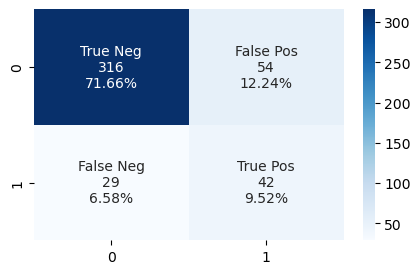

In [100]:
rf_tuned_model_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification(rf_tuned, X_test, y_test)
print("Testing performance:\n", rf_tuned_model_test_perf)

make_confusion_matrix(rf_tuned, X_test, y_test, figsize=(5, 3))

In [101]:
models_train_comp_df = pd.concat(
    [
        dTree_model_train_perf.T,
        dTree_tuned_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_model_tuned_train_perf.T,
        rf_model_train_perf.T,
        rf_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Model",
    "Bagging Model Tuned",
    "Random Forest Classifier",
    "Random Forest Tuned",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Decision Tree Tuned  Bagging Model  \
Accuracy             1.0             0.807580       0.985423   
Recall               1.0             0.753012       0.921687   
Precision            1.0             0.443262       0.987097   
F1                   1.0             0.558036       0.953271   

           Bagging Model Tuned  Random Forest Classifier  Random Forest Tuned  
Accuracy                   1.0                       1.0             0.872692  
Recall                     1.0                       1.0             0.608434  
Precision                  1.0                       1.0             0.604790  
F1                         1.0                       1.0             0.606607

In [102]:
models_test_comp_df = pd.concat(
    [
        dTree_model_test_perf.T,
        dTree_tuned_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_model_tuned_test_perf.T,
        rf_model_test_perf.T,
        rf_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Model",
    "Bagging Model Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree  Decision Tree Tuned  Bagging Model  \
Accuracy        0.775510             0.739229       0.866213   
Recall          0.366197             0.704225       0.338028   
Precision       0.325000             0.347222       0.666667   
F1              0.344371             0.465116       0.448598   

           Bagging Model Tuned  Random Forest Estimator  Random Forest Tuned  
Accuracy              0.854875                 0.863946             0.811791  
Recall                0.267606                 0.197183             0.591549  
Precision             0.612903                 0.823529             0.437500  
F1                    0.372549                 0.318182             0.502994

###### After reviewing all models, we can conclude that the decision tree tuned has the highest recall score and therefore should be used as the predictive model.  